<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            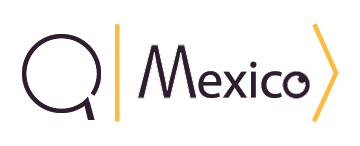
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Introducción a Qiskit</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Pablo González</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
2. [Circuitos cuanticos](#secc1)
3. [Visualización](#secc2)
4. [Conclusión](#secc3)
5. [Bibliografiás](#secc4)

<a id="intro"></a>
# Introducción

Vamos a entrenarnos un poco sobre el manejo de Qiskit[1], aquí empezaremos a manejar los circuitos cuánticos y su correspondiente visualización; muy probablemente tú como alumno estés impaciente por ver como se programa con estas herramientas para debutar tus propios proyectos, para satisfacer esa necesidad. En este notebook tendremos una breve introducción a los elementos básicos de Qiskit, veremos como puedes crear tu primer circuito cuántico y encontrar referencias importantes para seguir aprendiendo. Además de servirnos como ejemplo para poder importar documentos como este en diferentes plataformas.

<a id="secc1"></a>
# Circuitos cuánticos

Un circuito cuántico lo podemos definir como una combinación de una o varias compuertas cuánticas que realizan una operación sobre uno o varios qubits. Recordando que la aplicación es manejar el momento del espín sobre los ejes X, Y o Z y que en un circuito existe cierta independencia sobre que eje actuará esta compuerta sin tener un efecto sobre el estado de otro qubit, solo en el resultado medido al final. 

Empecemos a crear nuestro primer circuito cuántico utilizando la, previamente instalada, herramienta de Qiskit 

<div 
class="alert alert-block alert-success">

**Importante**

Recordar que para este taller se debe manejar la versión de Qiskit 0.28.0. Consulta el manual de instalación:
Ir al archivo de instalación: https://qmexico.org/docs/01_Introducci%C3%B3n_Qiskit.pdf
</div>

Una vez aclarado este punto, procedemos a irnos a nuestro navegador de Anaconda y seleccionamos el IDE de nuestra preferencia (Jupyter Notebook, Spyder, PyCharm) y ejecutamos la siguiente instrucción:

`from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer`

<br>

La cual es un llamado para importar los paquetes necesarios para crear nuestros circuitos, ahora procederemos a registrar nuestros qubits y bits clásicos.

`q =  QuantumRegister(1,"qreg")` esto para registrar  y nombrar nuestros qubits
`c = ClassicalRegister(1,"creg")` esto para registrar y nombrar nuestros bits clásicos

<br>

Finalmente,  vamos a decirle a nuestro programa cuál es el circuito cuántico final con la siguiente instrucción:
`qc = QuantumCircuit(q,c)`
Donde básicamente decimos, nuestro circuito cuántico se compone de los n qubits declarados como `q` que serían medidos con los n bits clásicos declarados como `c`. Una vez hecho esto, deberíamos tener algo similar a esto:

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
q =  QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")
qc = QuantumCircuit(q,c)
print("El circuito cuántico ha sido creado")

El circuito cuantico ha sido creado


Vamos a añadir algunas compuertas para visualizar más adelante su resultado:

In [7]:
qc.x(q[0])
qc.y(q[0])
qc.measure(q[0],c[0])
print("El circuito cuántico ha sido modificado")

El circuito cuantico ha sido modificado


Esto nos deja la libertad de utilizar números impares de bits clásicos para hacer las mediciones de los estados de los qubits (aunque por lo general, estaremos trabajando con números iguales de qubits y bits clásicos) en casos especiales como por ejemplo, el protocolo de teleportación.

<a id="secc2"></a>
## Visualización

Cuando realizamos circuitos cuánticos, una herramienta que nos ayuda mucho a revisar si hemos hecho un buen trabajo es visualizar el circuito de forma gráfica, ya que muchas veces podremos equivocarnos en nuestro código y ver una referencia visual nos ayuda mucho a encontrar fallos o errores de lógica. Para Qiskit tenemos varias formas de hacer estas representaciones. 

Una de estas es correspondiente a la clase `QuantumCircuit`, el cual es el método `.draw()`

In [8]:
qc.draw()

┌───┐┌───┐┌─┐
qreg_0: ┤ X ├┤ Y ├┤M├
        └───┘└───┘└╥┘
creg: 1/═══════════╩═
                   0

Este es uno de los métodos mas sencillos para visualizar circuitos cuánticos, puesto que no requiere ninguna librería especial para poder ser creado, su exportación es tan sencilla como copiar y pegar, por lo que se recomienda utilizar para programas en desarrollo o debugging.

Otro método para visualizar es usando el método `.draw()` pero con salida a `"mpl"` y no ASCII. La salida mpl es para resaltar el hecho de que utiliza la biblioteca de matplotlib[2], la cual es una herramienta especializada para la visualización de gráficos, figuras entre otros elementos visuales. 

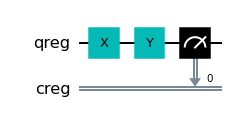

In [5]:
qc.draw("mpl")

A lo largo del taller descubrirás diversas formas de representar los circuitos cuánticos, adaptándose a las necesidades y gustos de cada usuario; ya sea que quieras una vista como la anterior o eres de las personas que le gusta el arte ASCII. Esto es un ejemplo de un qubit con un bit clásico, veamos un ejemplo de mas de uno.

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#Llamamos a los paquetes de Qiskit

q =  QuantumRegister(3,"qreg")    #Declaramos los qubits que queremos
c = ClassicalRegister(3,"creg")   #Y sus bits clásicos correspondientes
qc = QuantumCircuit(q,c)          #Ensamblamos el circuito
#Empezamos a crear las instrucciones con las compuertas para controlar los qubits y registros
qc.x(q[0])                        
qc.y(q[1])
qc.h(q[2])
qc.x(q[2]) 
#Ahora medimos con los registros clásicos correspondientes
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
#Y vemos el circuito final
#Primero en ASCII
qc.draw()


┌───┐     ┌─┐      
qreg_0: ┤ X ├─────┤M├──────
        ├───┤     └╥┘┌─┐   
qreg_1: ┤ Y ├──────╫─┤M├───
        ├───┤┌───┐ ║ └╥┘┌─┐
qreg_2: ┤ H ├┤ X ├─╫──╫─┤M├
        └───┘└───┘ ║  ║ └╥┘
creg: 3/═══════════╩══╩══╩═
                   0  1  2

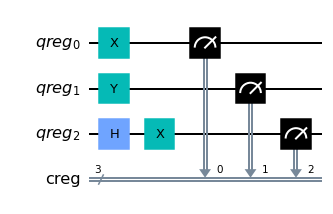

In [12]:
#Y despúes en mpl
qc.draw("mpl")

<a id="secc3"></a>
## Conclusión

Qiskit nos ha facilitado mucho el manejo de simulaciones para computación cuántica, realmente haciendo sencillo, rápido y fácil de entender para nuevos usuarios incluso de hacer mas rápido el crear circuitos para usuarios avanzados.

Qiskit nos permite además, crear entornos para pruebas donde la elegancia de este SDK(Software Development Kit) y la versatilidad del código así como las múltiples posibilidades para hacer con ellos, destacan.

<a id="secc4"></a>
## Referencias

- [1] Qiskit Development Team. Qiskit Documentation: Qiskit 0.28.0 Documentation. Consultado en: https://qiskit.org/documentation/     

- [2] Matplotlib Development Team. Matplotlib Documentation: Matplotlib: Visualization with Python. Consultado en: https://matplotlib.org/ 